<a href="https://colab.research.google.com/github/Henry-Le-CS/Basic-Machine-Learning/blob/master/Hand_Recognition_0_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment description

In this assignment, I will implement a simple NN to recognize handwritten digit from 0-9, using tensorflow.

This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)

**Data Description**

Each training example is a 20-pixel x 20-pixel grayscale image of the digit.

The sample is unzip to make a 1x400 vector

Therefore, we have a 5000x4 matrix X:
$
X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)
$

where each row is a sample.

The label matrix y is a 5000x1 vector, containing the label from 0 to 9.

Therefore, the project is a multiclass classification problem.



# Packages

I will use NumPy, Matplotlib, and Tensorflow:

- NumPy: This module will contain mathematical tools, and loading tool
- Matplotlib: Used for illustrating the data using imshow
- Tensorflow: Built our Neural Network
- Scikitlearn: Use for train split test

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Data loading and visualization

I will store the labels of the samples to the Y variable, while the Pixel map will be stored in the X variable.

In [52]:
X = np.load('PixelMap.npy')
Y = np.load('Label.npy')

In [53]:
print('The shape of X is: ', X.shape)
print('The shape of Y is: ', Y.shape)

The shape of X is:  (5000, 400)
The shape of Y is:  (5000, 1)


Next, I will visualize the data randomly.

Text(0.5, 0.98, 'The handwritten digits and their labels')

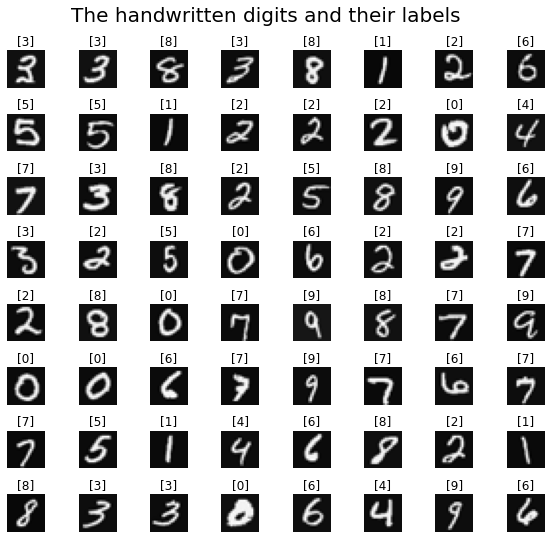

In [54]:
m,n = X.shape

fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.5, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m) #random sample
  #We choose the X[i] and reshape it back to 20x20 pixel map, then tranpose to
  #get a correct vertical image
  X_plot = X[random_index].reshape(20,20).T 
  ax.imshow(X_plot,cmap = 'gray')
  ax.set_title(f'{Y[random_index]}')
  ax.set_axis_off()
fig.suptitle('The handwritten digits and their labels',fontsize = 20)

# Defining test and train set

In this project, we will split the files to test-train set, with the proportion of 7/3 to avoid overfitting

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [56]:
print('The dimension of Training set is: X = {}, Y = {}'.format(X_train.shape,Y_train.shape))
print('The dimension of Testing set is: X = {}, Y = {}'.format(X_test.shape,Y_test.shape))

The dimension of Training set is: X = (3500, 400), Y = (3500, 1)
The dimension of Testing set is: X = (1500, 400), Y = (1500, 1)


# Define our model

For this project, I will implement a simple Neural network with 3 layers (2 hidden layers and 1 output layer):

- The first hidden layer with input size of (400,), contains 25 neurons. It uses ReLU activation functions
- The second hidden layer with input size of (25,), contains 15 neurons. It also uses ReLU activation functions
- The output layer with input size of (15,), contains 15 neurons. It uses Softmax activation function to classify categories.

In [57]:
model = keras.Sequential(
    [
        keras.Input(shape=(400,)),
        keras.layers.Dense(units = 25, activation = 'relu'),
        keras.layers.Dense(units = 15, activation = 'relu'),
        keras.layers.Dense(units = 10, activation = 'softmax')
    ]
)

Note that the shape of parameter for each layer has the following dimensions:
$
W^{l} \in \mathbb{R}^{S_{in}xS_{out}}, 
$
$
b^{l} \in \mathbb{R}^{S_{out}}
$

Where $S_{in}$ is the number of "neurons" of the previous layer, $S_{out}$ is the number of neurons of the current layer.

The model is summarized as below:

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                10025     
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


The total parameter needed is correctly predicted as we predicted.

Total parameters = (25x40+25) + (15x25+15)+(10*15+10)

For the loss function and optimizer, I will use the Sparse Categorical Cross Entropy loss function and Adam algorithm with a learning rate of 0.001 instead of the common Gradien Descent

In [59]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(0.001)
)

# Data Training

We will train the model with 50 epochs

The model.fit will return a loss history, we will have a look at it after training our model

In [60]:
loss_history = model.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 1.7337
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 0.8525
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 0.5419
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 0.4119
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 0.3405
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 8/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 9/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2233
Epoch 10/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2065
Epoch 11/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 12/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1776
Epoch 13/50
110/110 [====

As can be seen, the loss of our training model decreases  over the epoch, approaching 0.

In [61]:
loss_history = loss_history.history.get('loss')

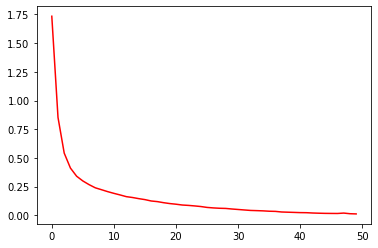

In [62]:
plt.plot(loss_history[:],'r-')

# Data testing

Firstly, I will use the model to predict some label of the test set. Next, I will visualize some of them and conclude with the precision. 

In [67]:
pred = model.predict(X_test[0].reshape(1,400))
print('The predicted label: {}, the test label: {}'.format(np.argmax(pred),Y_test[0]))
pred = model.predict(X_test[9].reshape(1,400))
print('The predicted label: {}, the test label: {}'.format(np.argmax(pred),Y_test[9]))
pred = model.predict(X_test[999].reshape(1,400))
print('The predicted label: {}, the test label: {}'.format(np.argmax(pred),Y_test[999]))
pred = model.predict(X_test[1111].reshape(1,400))
print('The predicted label: {}, the test label: {}'.format(np.argmax(pred),Y_test[1111]))

1/1 [==============================] - 0s 17ms/step
The predicted label: 1, the test label: [1]
1/1 [==============================] - 0s 18ms/step
The predicted label: 1, the test label: [1]
1/1 [==============================] - 0s 22ms/step
The predicted label: 9, the test label: [9]
1/1 [==============================] - 0s 17ms/step
The predicted label: 6, the test label: [6]


We can see the prediction works quite good.
Now we will visualize the data randomly.

1/1 [==============================] - 0s 18ms/step


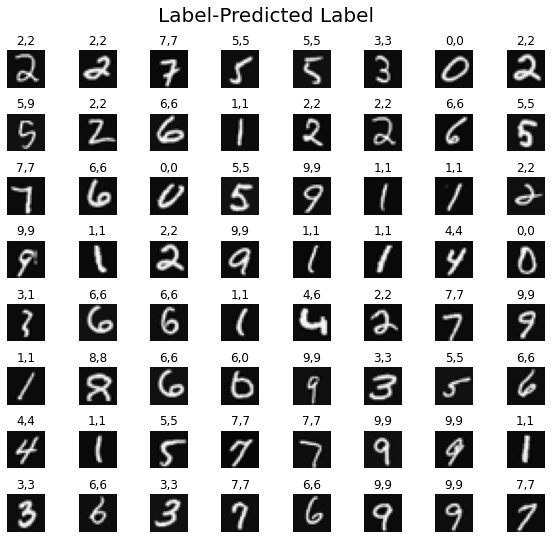

In [72]:
m,n = X_test.shape

fig, axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad=0.5, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random = X_test[random_index].reshape(20,20).T
  Y_predict = np.argmax(model.predict(X_test[random_index].reshape(1,400)))
  ax.imshow(X_random, cmap = 'gray')
  ax.set_title('{},{}'.format(Y_test[random_index,0],Y_predict))
  ax.set_axis_off()
fig.suptitle('Label-Predicted Label', fontsize = 20)
fig.show()

From the visualization above, we can see the prediction worked well, but there were still many mispredictions. 

For example, row 2 column 1, the data is 5 but it is written similar to 9, or row 6 column 4, the data is 6 but it is similar to 0,...

These misprediction can be well-explained as the data source comes from many people. Generally speaking, they can even be misinterpreted even if it is checked by human.

Therefore, we will run a test to check the precision of the model.

In [94]:
pred = model.predict(X_test)

47/47 [==============================] - 0s 1ms/step


In [114]:
m = pred.shape[0]
Ypredict = np.zeros((m,))
for i in range(m):
  Ypredict[i] = np.argmax(pred[i])
print('The precision of the model is: {}'.format(np.sum(Ypredict.reshape(-1,1)==Y_test)/m*100))

The precision of the model is: 92.73333333333333


# Conclusion

The precision of the model is approximately 92.7%, which is acceptable. To obtain better precision, we can train our model with higher number of epochs. This will be left for the reader to try out to test.

Through this assignment, we get a clearer understanding of a neural network and a multiclass classification problem.